In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from collections import OrderedDict
import datetime
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn import set_config
set_config(print_changed_only=False)

In [3]:
# df=pd.read_csv('kc_house_data.csv')

In [4]:
# df['lat']=df['lat'].astype('str')
# df['long']=df['long'].astype('str')

# df['year']=df[''].astype('str')

# df['Year'] = df['date'].str[0:4].astype('str')

# df['Month'] = df['date'].str[4:6].astype('str')

# df = df.drop('date', 1)

# df[df['id'].duplicated()]

# df['id'].value_counts()

# df = df.drop('id', 1)

# df['latlon'] = df[['lat', 'long']].apply(lambda x: ','.join(x), axis=1)

# # import module 
# from geopy.geocoders import Nominatim 
# City=[]
# for i in df['latlon']:
#     try:
# # initialize Nominatim API 
#         geolocator = Nominatim(user_agent="geoapiExercises") 

#         location = geolocator.reverse(i) 

#         address = location.raw['address'] 
#         address.get('city', '')

#         city = address.get('city', '')
#         City.append(city)
#     except:
#         City.append('')


# df['city'] = pd.Series(City)

# df['city']=df['city'].fillna(0)

# df.to_excel("baru.xlsx", index=False)

# df

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_excel('baru.xlsx')

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,latlon,city
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,10,"47.5112,-122.257",Seattle
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,"47.721000000000004,-122.319",Seattle
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,2,"47.7379,-122.23299999999999",Kenmore
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,2014,12,"47.5208,-122.39299999999999",Seattle
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,2,"47.6168,-122.045",Sammamish


In [8]:
df.shape

(20922, 23)

In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Year', 'Month', 'latlon', 'city'],
      dtype='object')

In [10]:
df.dtypes

price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Year               int64
Month              int64
latlon            object
city              object
dtype: object

In [11]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,latlon,city
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,10,"47.5112,-122.257",Seattle
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,"47.721000000000004,-122.319",Seattle
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,2,"47.7379,-122.23299999999999",Kenmore
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,2014,12,"47.5208,-122.39299999999999",Seattle
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,2,"47.6168,-122.045",Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20917,1010000,4,3.50,3510,7200,2.0,0,0,3,9,...,0,98136,47.5537,-122.398,2050,6200,2015,3,"47.5537,-122.398",0
20918,475000,3,2.50,1310,1294,2.0,0,0,3,8,...,0,98116,47.5773,-122.409,1330,1265,2015,2,"47.5773,-122.40899999999999",0
20919,360000,3,2.50,1530,1131,3.0,0,0,3,8,...,0,98103,47.6993,-122.346,1530,1509,2014,5,"47.6993,-122.346",0
20920,400000,4,2.50,2310,5813,2.0,0,0,3,8,...,0,98146,47.5107,-122.362,1830,7200,2015,2,"47.5107,-122.36200000000001",0


In [12]:
df['DurYear']=df['Year']-df['yr_built']

In [13]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,latlon,city,DurYear
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,"47.5112,-122.257",Seattle,59
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,"47.721000000000004,-122.319",Seattle,63
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,"47.7379,-122.23299999999999",Kenmore,82
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,"47.5208,-122.39299999999999",Seattle,49
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,"47.6168,-122.045",Sammamish,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20917,1010000,4,3.50,3510,7200,2.0,0,0,3,9,...,98136,47.5537,-122.398,2050,6200,2015,3,"47.5537,-122.398",0,6
20918,475000,3,2.50,1310,1294,2.0,0,0,3,8,...,98116,47.5773,-122.409,1330,1265,2015,2,"47.5773,-122.40899999999999",0,7
20919,360000,3,2.50,1530,1131,3.0,0,0,3,8,...,98103,47.6993,-122.346,1530,1509,2014,5,"47.6993,-122.346",0,5
20920,400000,4,2.50,2310,5813,2.0,0,0,3,8,...,98146,47.5107,-122.362,1830,7200,2015,2,"47.5107,-122.36200000000001",0,1


In [14]:
df = df.drop('lat', 1)
df = df.drop('long', 1)
df=df.drop('latlon',1)

In [15]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
sqft_living15       0
sqft_lot15          0
Year                0
Month               0
city             7115
DurYear             0
dtype: int64

In [16]:
df.dtypes

price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
Year               int64
Month              int64
city              object
DurYear            int64
dtype: object

In [17]:
df['city'].value_counts()

Seattle              6250
Bellevue             1177
Renton                914
Sammamish             868
Kent                  783
0                     657
Shoreline             650
Auburn                505
Kenmore               295
Covington             253
Mercer Island         228
Lake Forest Park      216
Bothell               183
Woodinville           151
Duvall                141
Newcastle             128
Tukwila               115
Normandy Park         101
Black Diamond          59
Pacific                42
Medina                 35
Algona                 25
Carnation              22
King County             6
Mountlake Terrace       2
Tacoma                  1
Name: city, dtype: int64

In [18]:
df['city'] = df['city'].replace({'0':np.nan, 0:np.nan})

In [19]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
sqft_living15       0
sqft_lot15          0
Year                0
Month               0
city             7772
DurYear             0
dtype: int64

In [20]:
df=df.dropna(axis = 0,how='any')

In [21]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Year,Month,DurYear
count,1.315000e+04,13150.000000,13150.000000,13150.000000,1.315000e+04,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000
mean,5.160797e+05,3.332015,2.047110,2012.227224,1.508745e+04,1.459506,0.005856,0.217719,3.423422,7.580304,1726.131179,286.096046,1969.341901,85.596578,98078.719696,1951.640304,12760.065399,2014.326920,6.560000,44.985019
std,3.042658e+05,0.856696,0.684492,810.351148,4.194569e+04,0.526627,0.076300,0.734081,0.655414,1.096760,747.017256,426.614525,29.024405,404.381847,53.810371,648.703615,26143.033329,0.469106,3.123515,29.028048
min,7.800000e+04,1.000000,1.000000,420.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,420.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,2014.000000,1.000000,-1.000000
25%,3.170000e+05,3.000000,1.500000,1410.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,1470.000000,5112.750000,2014.000000,4.000000,21.000000
50%,4.450000e+05,3.000000,2.000000,1890.000000,7.620000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1972.000000,0.000000,98070.000000,1820.000000,7645.000000,2014.000000,6.000000,42.000000
75%,6.250000e+05,4.000000,2.500000,2480.000000,1.057775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,560.000000,1994.000000,0.000000,98118.000000,2310.000000,10080.000000,2015.000000,9.000000,64.000000
max,4.490000e+06,6.000000,3.500000,7420.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,7420.000000,2850.000000,2015.000000,2015.000000,98199.000000,5790.000000,434728.000000,2015.000000,12.000000,115.000000


In [22]:
df.describe(include='O')

,city
count,13150
unique,25
top,Seattle
freq,6250


In [23]:
df['bedrooms'].value_counts()

3    6115
4    4140
2    1760
5     899
6     132
1     104
Name: bedrooms, dtype: int64

In [24]:
df=df.groupby('bedrooms').filter(lambda x : len(x)>=150)

In [25]:
df['bathrooms'].value_counts()

2.50    3281
1.00    2434
1.75    1903
2.25    1248
2.00    1215
1.50     906
2.75     706
3.00     466
3.50     414
3.25     341
Name: bathrooms, dtype: int64

In [26]:
df=df.groupby('bathrooms').filter(lambda x : len(x)>=500)

In [27]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Year,Month,city,DurYear
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,1340,5650,2014,10,Seattle,59
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,1690,7639,2014,12,Seattle,63
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,2720,8062,2015,2,Kenmore,82
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,1800,7503,2015,2,Sammamish,28
8,323000,3,2.50,1890,6560,2.0,0,0,3,7,...,0,2003,0,98038,2390,7570,2015,3,Bellevue,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20257,299999,3,2.25,1350,1234,2.0,0,0,3,7,...,190,2007,0,98106,1420,1234,2015,2,Black Diamond,8
20259,303000,3,2.50,2056,3564,2.0,0,0,3,7,...,0,2014,0,98092,2056,3577,2014,12,Seattle,0
20260,525000,2,2.50,1160,1458,2.0,0,0,3,8,...,120,2012,0,98119,1650,2311,2014,7,Renton,2
20262,420000,2,1.50,1100,1107,3.0,0,0,3,8,...,0,2008,0,98103,1110,2750,2014,10,Seattle,6


In [28]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])



In [29]:
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,price,int64,0,0.0,2486,"[160797, 766000]"
1,bedrooms,int64,0,0.0,4,"[2, 5]"
2,bathrooms,float64,0,0.0,7,"[2.75, 1.0]"
3,sqft_living,int64,0,0.0,598,"[1690, 2820]"
4,sqft_lot,int64,0,0.0,6250,"[8563, 21336]"
5,floors,float64,0,0.0,6,"[2.5, 2.0]"
6,waterfront,int64,0,0.0,2,"[1, 0]"
7,view,int64,0,0.0,5,"[3, 1]"
8,condition,int64,0,0.0,5,"[2, 1]"
9,grade,int64,0,0.0,9,"[7, 12]"


<AxesSubplot:>

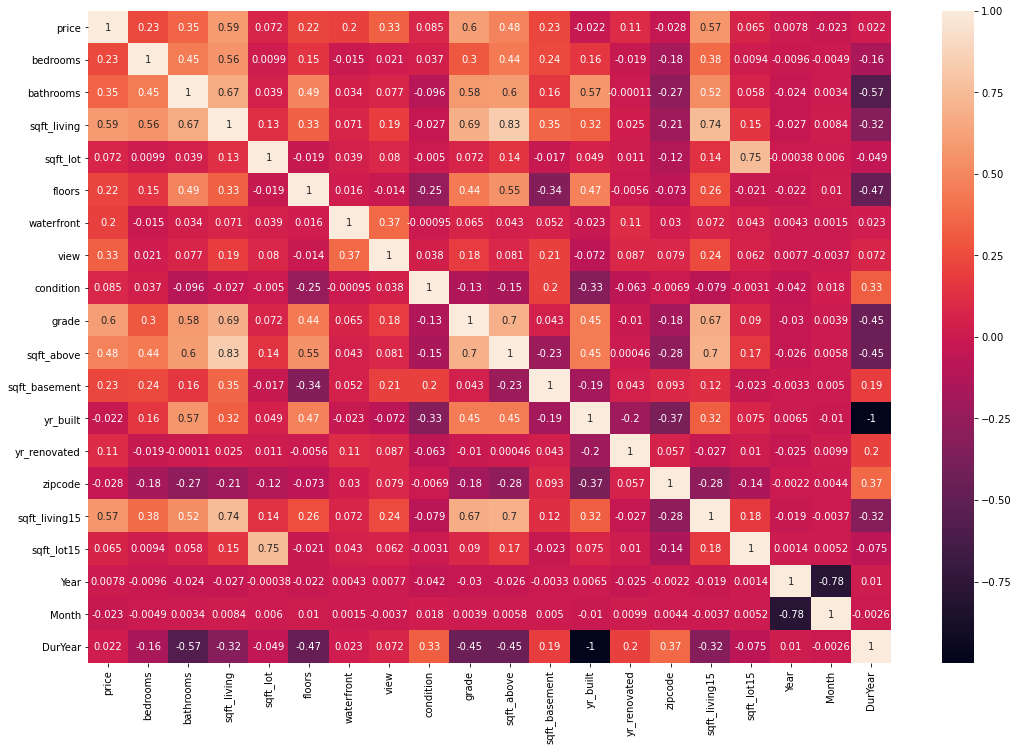

In [30]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)

In [31]:
(pd.crosstab(index=df['grade'], columns = df['floors'],normalize= 'index')*100).round(2)

floors,1.0,1.5,2.0,2.5,3.0,3.5
grade,,,,,,
4,100.00,0.00,0.00,0.00,0.00,0.00
5,80.62,18.60,0.78,0.00,0.00,0.00
6,82.23,14.81,2.88,0.08,0.00,0.00
7,68.24,11.27,19.56,0.09,0.84,0.00
8,40.63,7.21,46.61,0.40,5.09,0.06
9,18.05,3.34,75.36,1.03,2.22,0.00
10,16.67,4.17,76.11,0.83,2.22,0.00
11,10.53,3.51,80.70,1.75,3.51,0.00
12,0.00,0.00,100.00,0.00,0.00,0.00


<AxesSubplot:xlabel='floors', ylabel='price'>

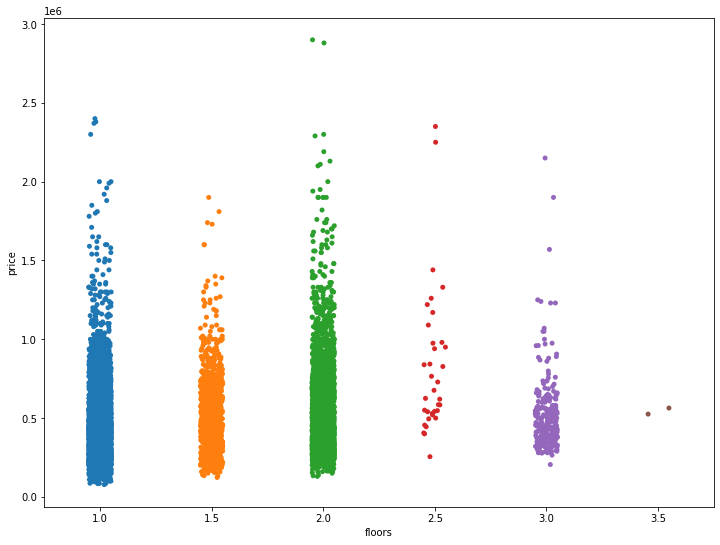

In [32]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'floors', y = 'price', data = df)

Bangunan tempat tinggal yang memiliki lantai 1 dan 2 mempunyai pangsa pasar lebih besar. Grade meningkat dan berhenti di lantai 2. Menandakan peningkatan grade tidak sebanding dengan meningkatnya jumlah lantai

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

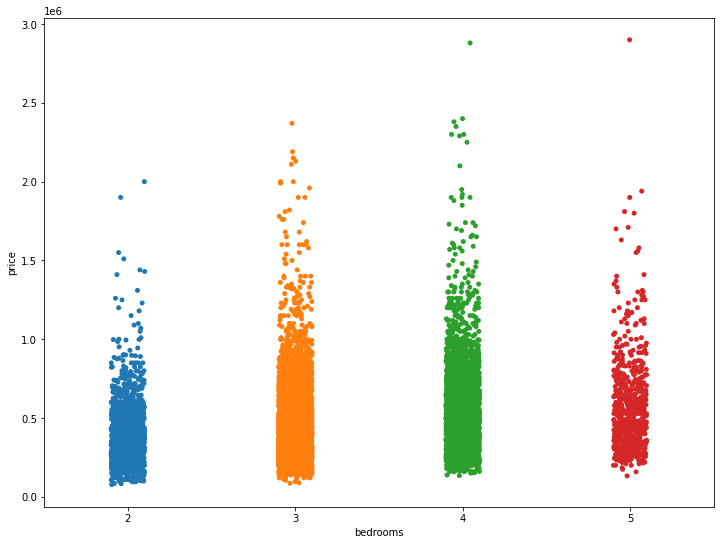

In [33]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'bedrooms', y = 'price', data = df)

sama dengan lantai, jumlah kamar juga berhenti di tengah-tengah. tidak berarti bahwa jumlah kamar bertambah berarti jumlah harga bertambah, melainkan jumlah kamar yang idealis untuk keluarga kecil adalah hal yang paling diminati sehingga menambah harga di pasar.

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

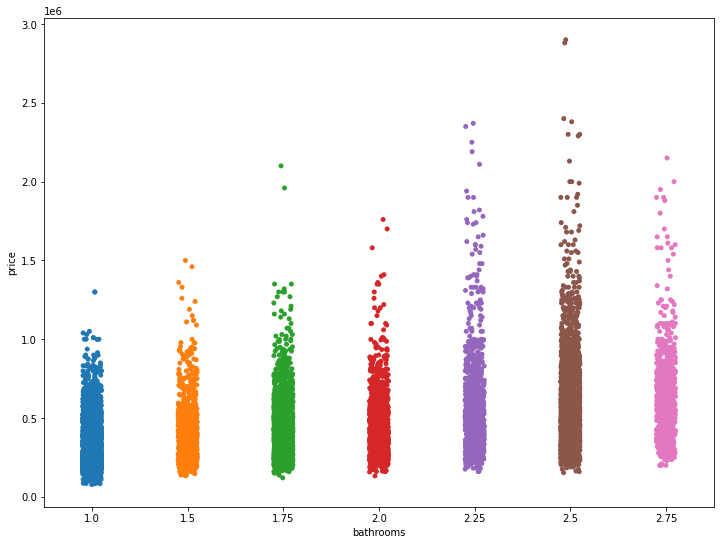

In [34]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'bathrooms', y = 'price', data = df)

Berbeda dengan jumlah lantai dan kamar tidur, jumlah kamar mandi lumayan berpengaruh kepada harga. selain itu, penambahan fasilitas kamar mandi seperti wastafel juga menambah harga jual.

<AxesSubplot:xlabel='grade', ylabel='price'>

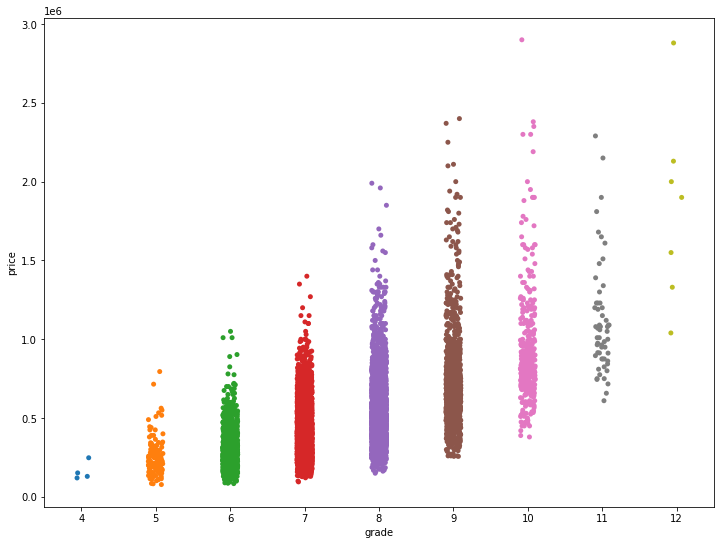

In [35]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'grade', y = 'price', data = df)

dari ketiga faktor diatas, kita bisa menyimpulkan seperti apa grade rumah yang dijual, dengan begitu kita bisa menjual rumah dengan grade dan harga yang pas juga. Semakin bertambahnya grade, maka harga jual juga akan ikut naik. Sayangnya, walaupun begitu tetap saja harga rendah hingga menengahlah yang paling diminati oleh pasar.

<AxesSubplot:xlabel='condition', ylabel='price'>

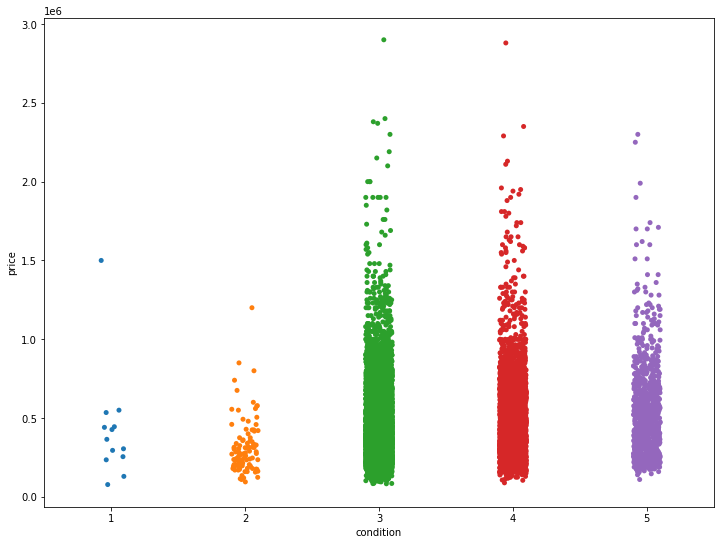

In [36]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'condition', y = 'price', data = df)

dilihat dari visualisasi penyebaran diatas, kondisi dirumah dibawah rata-rata memiliki harga yang sangat rendah, selain itu, hal itu juga memiliki pangsa pasar yang sangat sedikit dibanding dengan konidsi rumah rata-rata keatas. Untuk harga sendiri, kondisi rata-rata keatas memiliki pengaruh harga yang tidak jauh berbeda satu dengan yang lainnya.

<AxesSubplot:xlabel='view', ylabel='price'>

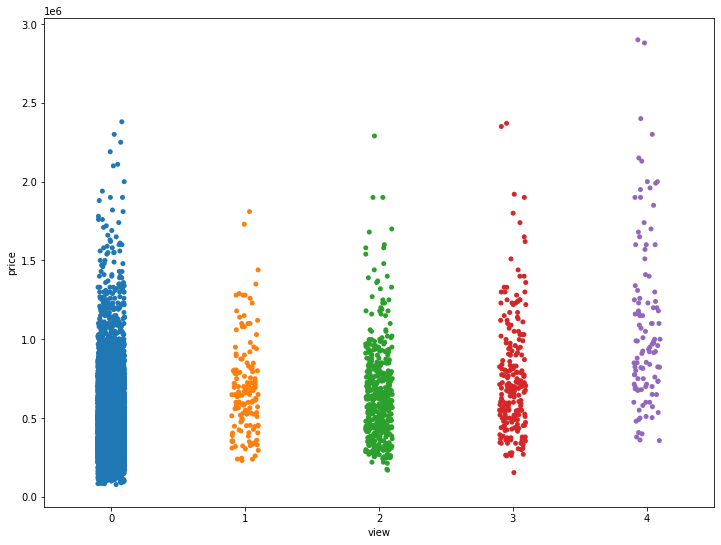

In [37]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'view', y = 'price', data = df)

Rumah yang tidak memiliki view memiliki jumlah penawaran yang sangat banyak dibanding dengan yang lainnya. Ketika rumah memiliki view, maka harga minimum rumah akan naik walaupun tidak begitu signifikan. Selain itu, view dengan jumlah 3 lebih diniminat ketimbang jumlah diatasnya. Untuk harga dengan jumlah view diatas 0, memiliki harga yang tidak berbeda jauh.

<AxesSubplot:xlabel='city', ylabel='price'>

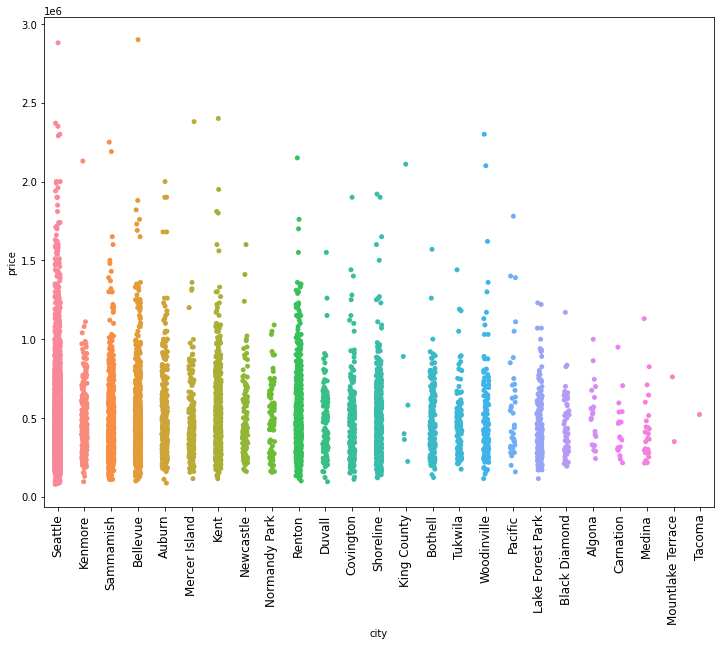

In [38]:
plt.figure(figsize=(12,9))
plt.xticks(x='city', rotation=90, size=12)
sns.stripplot(x = 'city', y = 'price', data = df)

Untuk pangsa pasar terbesar terdapat di kota Seattle dan yang terendah berada di Tacoma. 

<AxesSubplot:xlabel='waterfront', ylabel='price'>

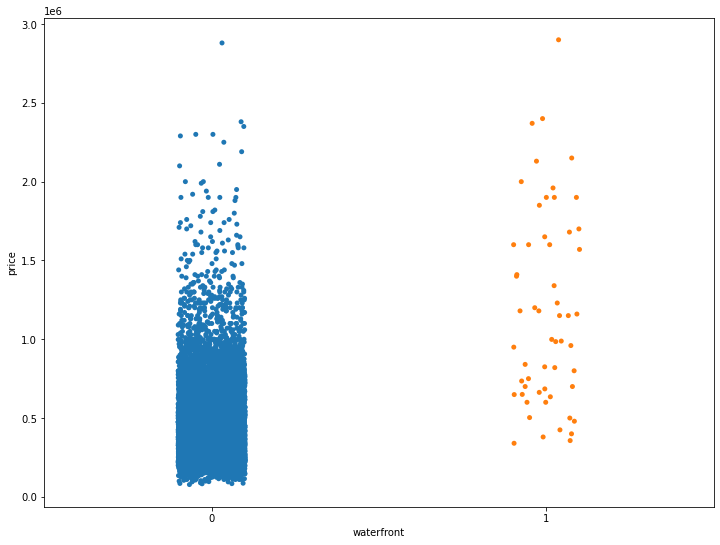

In [39]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'waterfront', y = 'price', data = df)

Waterfront berpengaruh pada harga minimun, tetapi tidak begitu berpengaruh kepada kenaikan harga. Pangsa pasar mayoritas tidak terlalu melihat adanya waterfront atau tidak.

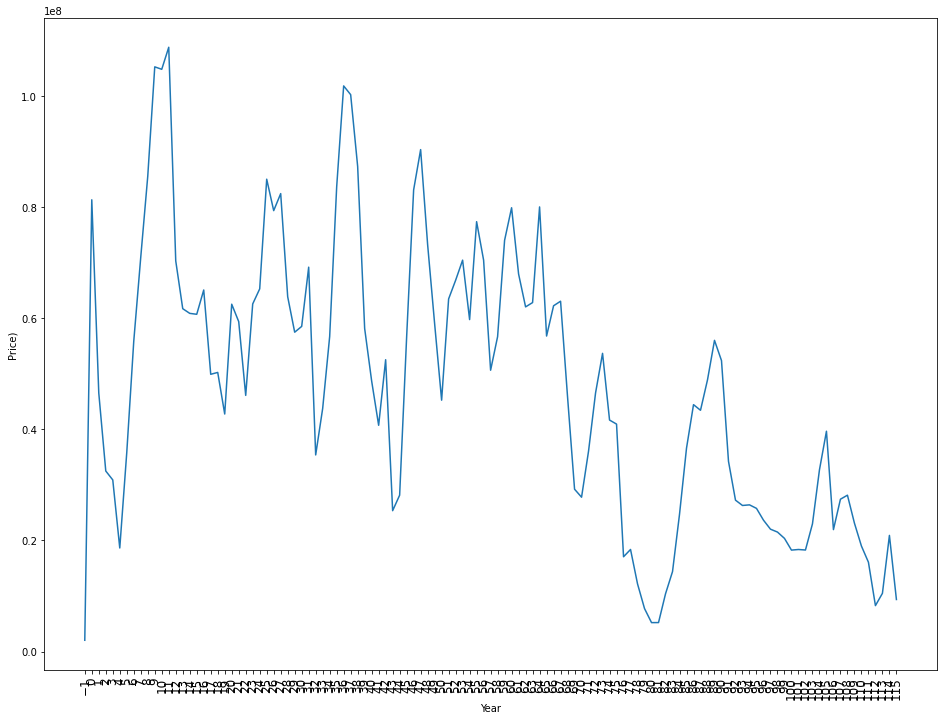

In [40]:
keys = [pair for pair, df in df.groupby(['DurYear'])]
plt.figure(figsize=(16,12))
plt.plot(keys,df.groupby(['DurYear']).sum()['price']) 
plt.xticks(keys, rotation=90, size=12)
plt.ylabel('Price)')
plt.xlabel('Year')
plt.show()

Dari grafik ini kita bisa melihat berapa lama rumah akan dijual setelah dibangun, terlihat penjualan rumah ramai pada awal-awal, tampaknya ini dijual oleh para developer. Lalu grafik akan turun karena saat itulah rumah akan ditinggali. setelah beberapa tahun berjalan, barulah mereka menjual rumah dengan alasan pindah atau ingin suasana baru, terlihat bahwa grafik naik drastis.

Penjualan ini memiliki pola yaitu Jual-Ditinggali selama berapa tahun lalu dijual kembali.

Selain itu, semakin lama rumah itu dijual setelah dibangun sangat berpengaruh pada harga, dapat dilihat dengan trend grafik terus menurun.

# Machine Learning #

In [41]:
df=pd.get_dummies(data=df, columns=['city'], prefix_sep='-')
df=pd.get_dummies(data=df, columns=['zipcode'], prefix_sep='-')

In [42]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade',
       ...
       'zipcode-98146', 'zipcode-98148', 'zipcode-98155', 'zipcode-98166',
       'zipcode-98168', 'zipcode-98177', 'zipcode-98178', 'zipcode-98188',
       'zipcode-98198', 'zipcode-98199'],
      dtype='object', length=114)

In [43]:
df['yr_renovated'].loc[(df['yr_renovated'] != 0)] = 1

In [44]:
df['yr_renovated'].unique()

array([0, 1], dtype=int64)

In [45]:
df = df.drop('Month', 1)
df = df.drop('Year', 1)

In [46]:
X=df.drop(columns='price')
y=df['price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state = 0)

# Tree #

In [48]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
print(tree.score(X_train,y_train))

0.9999610542282831


In [50]:
param_tree = {"ccp_alpha" : [100, 200, 500, 700, 1000],
          "max_depth" : [None, 5, 7, 9, 20, 25],
          "min_samples_split" : [2, 9, 15, 25],
          "min_samples_leaf" : [1, 2, 5, 10],
          "max_features" : [None, .8, .7, .6]}

model_tree = GridSearchCV(estimator=tree, param_grid=param_tree, cv = 4, n_jobs=-1, verbose=1)
model_tree.fit(X_train, y_train)

Fitting 4 folds for each of 1920 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 7673 out of 7680 | elapsed:  6.3min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 7680 out of 7680 | elapsed:  6.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ccp_alpha': [100, 200, 500, 700, 1000],
                         'max_depth': [None, 5, 7, 9, 20, 25],
                         'ma

In [51]:
model_tree.score(X_train, y_train)

0.8622287015865574

In [52]:
reg = DecisionTreeRegressor()
reg = model_tree.fit(X_train, y_train)

y_pred_rf=reg.predict(X_test)

y_pred_train_rf=reg.predict(X_train)

tree_train = reg.predict(X_train)
tree_test = reg.predict(X_test)

MAE_train = mean_absolute_error(y_train, y_pred_train_rf)
MAE_test = mean_absolute_error(y_test, y_pred_rf)

MSE_train = mean_squared_error(y_train, y_pred_train_rf)
MSE_test = mean_squared_error(y_test, y_pred_rf)

RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

R2_train = r2_score(y_train, y_pred_train_rf)
R2_test = r2_score(y_test, y_pred_rf)

test = np.array([MAE_test,MSE_test,RMSE_test,R2_test])
train = np.array([MAE_train,MSE_train,RMSE_train,R2_train])

data=pd.DataFrame( OrderedDict( ({ 'test': pd.Series(test), 'train': pd.Series(train),} ),method=['MAE','MSE','RMSE','R2']) )
data

Fitting 4 folds for each of 1920 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2884 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4384 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 6084 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 7424 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 7680 out of 7680 | elapsed:  6.4min finished


,test,train,method
0,9.715552e+04,6.501645e+04,MAE
1,2.094754e+10,9.802599e+09,MSE
2,1.447326e+05,9.900808e+04,RMSE
3,6.328837e-01,8.408011e-01,R2


# Random Forest #

In [53]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
print(RF.score(X_train,y_train))

0.9677066971046085


In [55]:
param_RF = {"n_estimators" : [100, 200],
          "max_depth" : [None, 5],
          "min_samples_split" : [2, 9],
          "min_samples_leaf" : [1, 2],
          "max_features" : [None, .8]}

model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv = 4, n_jobs=-1, verbose=1)
model_RF.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed: 10.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [56]:
print(model_RF.score(X_train, y_train))

0.9692936855283011


In [57]:
reg = RandomForestRegressor()
reg = model_RF.fit(X_train, y_train)

y_pred_rf=reg.predict(X_test)

y_pred_train_rf=reg.predict(X_train)

tree_train = reg.predict(X_train)
tree_test = reg.predict(X_test)

MAE_train = mean_absolute_error(y_train, y_pred_train_rf)
MAE_test = mean_absolute_error(y_test, y_pred_rf)

MSE_train = mean_squared_error(y_train, y_pred_train_rf)
MSE_test = mean_squared_error(y_test, y_pred_rf)

RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

R2_train = r2_score(y_train, y_pred_train_rf)
R2_test = r2_score(y_test, y_pred_rf)

test = np.array([MAE_test,MSE_test,RMSE_test,R2_test])
train = np.array([MAE_train,MSE_train,RMSE_train,R2_train])

data=pd.DataFrame( OrderedDict( ({ 'test': pd.Series(test), 'train': pd.Series(train),} ),method=['MAE','MSE','RMSE','R2']) )
data

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed: 11.0min finished


,test,train,method
0,7.406234e+04,2.746938e+04,MAE
1,1.252449e+10,1.894449e+09,MSE
2,1.119129e+05,4.352527e+04,RMSE
3,7.805019e-01,9.692332e-01,R2


# Linreg #

In [58]:
from sklearn import linear_model
lin=linear_model.LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(lin.score(X_train,y_train))

0.8163274459752896


In [60]:
param_linreg = {'fit_intercept' : [100, 200, 500, 700, 1000],
                'normalize' : [None, 5, 7, 9, 20, 25],
                'copy_X' : [2, 9, 15, 25],
                'n_jobs' : [1, 2, 5, 10]}

model_linreg = GridSearchCV(estimator=lin, param_grid=param_linreg,cv = 4, n_jobs=-1, verbose=1)
model_linreg.fit(X_train, y_train)

Fitting 4 folds for each of 480 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 470 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1270 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1820 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  2.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'copy_X': [2, 9, 15, 25],
                         'fit_intercept': [100, 200, 500, 700, 1000],
                         'n_jobs': [1, 2, 5, 10],
                         'normalize': [None, 5, 7, 9, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [61]:
print(model_linreg.score(X_train,y_train))

0.8163274459752896


In [62]:
reg = linear_model.LinearRegression()
reg = model_linreg.fit(X_train, y_train)

y_pred_rf=reg.predict(X_test)

y_pred_train_rf=reg.predict(X_train)

tree_train = reg.predict(X_train)
tree_test = reg.predict(X_test)

MAE_train = mean_absolute_error(y_train, y_pred_train_rf)
MAE_test = mean_absolute_error(y_test, y_pred_rf)

MSE_train = mean_squared_error(y_train, y_pred_train_rf)
MSE_test = mean_squared_error(y_test, y_pred_rf)

RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

R2_train = r2_score(y_train, y_pred_train_rf)
R2_test = r2_score(y_test, y_pred_rf)

test = np.array([MAE_test,MSE_test,RMSE_test,R2_test])
train = np.array([MAE_train,MSE_train,RMSE_train,R2_train])

data=pd.DataFrame( OrderedDict( ({ 'test': pd.Series(test), 'train': pd.Series(train),} ),method=['MAE','MSE','RMSE','R2']) )
data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 480 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1538 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.8min finished


,test,train,method
0,6.838467e+04,6.953421e+04,MAE
1,1.018126e+10,1.130955e+10,MSE
2,1.009022e+05,1.063464e+05,RMSE
3,8.215683e-01,8.163274e-01,R2


# KNN #

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn_rg=KNeighborsRegressor()
knn_rg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [64]:
print(knn_rg.score(X_train,y_train))

0.5891108359851016


In [65]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters yang akan diuji

param_KNN = {"n_neighbors" : [75, 100, 125, 135, 175],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

model_knn = GridSearchCV(estimator=knn_rg, param_grid=param_KNN, n_jobs = -1, cv = 5, verbose=1 )
model_knn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [75, 100, 125, 135, 175], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [66]:
print(model_knn.score(X_train,y_train))

0.9999610542282831


In [67]:
reg = linear_model.LinearRegression()
reg = model_knn.fit(X_train, y_train)

y_pred_rf=reg.predict(X_test)

y_pred_train_rf=reg.predict(X_train)

tree_train = reg.predict(X_train)
tree_test = reg.predict(X_test)

MAE_train = mean_absolute_error(y_train, y_pred_train_rf)
MAE_test = mean_absolute_error(y_test, y_pred_rf)

MSE_train = mean_squared_error(y_train, y_pred_train_rf)
MSE_test = mean_squared_error(y_test, y_pred_rf)

RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

R2_train = r2_score(y_train, y_pred_train_rf)
R2_test = r2_score(y_test, y_pred_rf)

test = np.array([MAE_test,MSE_test,RMSE_test,R2_test])
train = np.array([MAE_train,MSE_train,RMSE_train,R2_train])

data=pd.DataFrame( OrderedDict( ({ 'test': pd.Series(test), 'train': pd.Series(train),} ),method=['MAE','MSE','RMSE','R2']) )
data

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


,test,train,method
0,1.291349e+05,2.317191e+01,MAE
1,3.197140e+10,2.398068e+06,MSE
2,1.788055e+05,1.548570e+03,RMSE
3,4.396849e-01,9.999611e-01,R2


# MAE ETC not tuned #

In [68]:
reg = linear_model.LinearRegression()
reg = reg.fit(X_train, y_train)

y_pred_rf=reg.predict(X_test)

y_pred_train_rf=reg.predict(X_train)

tree_train = reg.predict(X_train)
tree_test = reg.predict(X_test)

MAE_train = mean_absolute_error(y_train, y_pred_train_rf)
MAE_test = mean_absolute_error(y_test, y_pred_rf)

MSE_train = mean_squared_error(y_train, y_pred_train_rf)
MSE_test = mean_squared_error(y_test, y_pred_rf)

RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

R2_train = r2_score(y_train, y_pred_train_rf)
R2_test = r2_score(y_test, y_pred_rf)

test = np.array([MAE_test,MSE_test,RMSE_test,R2_test])
train = np.array([MAE_train,MSE_train,RMSE_train,R2_train])

data=pd.DataFrame( OrderedDict( ({ 'test': pd.Series(test), 'train': pd.Series(train),} ),method=['MAE','MSE','RMSE','R2']) )
data

,test,train,method
0,6.838467e+04,6.953421e+04,MAE
1,1.018126e+10,1.130955e+10,MSE
2,1.009022e+05,1.063464e+05,RMSE
3,8.215683e-01,8.163274e-01,R2
